<a href="https://colab.research.google.com/github/codewithsrs/app-data-analysis/blob/main/playstore_app_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We imported the necessary libraries that can be needed for our EDA.

**Lets read the file as play_df and reviews_df for play_store data and user_reviews data**

In [2]:
play_df = pd.read_csv("/content/drive/MyDrive/Copy of Play Store Data.csv")
reviews_df = pd.read_csv("/content/drive/MyDrive/Copy of User Reviews.csv")

In [3]:
play_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [5]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [6]:
play_df.drop(play_df[play_df['Category']=='1.9'].index,inplace = True)

**We have the question to find out the average rating of the paid apps and free apps and compare them**

In [7]:
play_df.groupby('Type')['Rating'].mean()

Type
Free    4.186203
Paid    4.266615
Name: Rating, dtype: float64

We saw the result that the average rating of free and paid apps are very close and yet the average rating of paid apps is more . So we can say paid apps are performing well

**Now lets check the number of paid apps and number of free apps to total apps**

In [8]:
#we have one index missing from the dataframe so lets reset and drop the old index column
play_df.reset_index(inplace=True)
play_df.drop(['index'],inplace = True,axis = 1)

<BarContainer object of 3 artists>

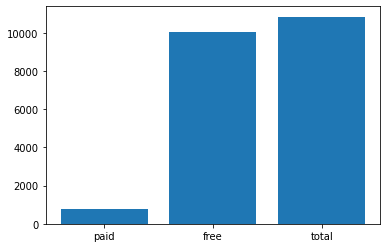

In [9]:
paid_list=[]
free_list = []
total_list = [i for i in play_df['App']]
for i in range(len(play_df['Type'])):
  if play_df['Type'][i]=='Paid':
    paid_list.append(play_df['App'][i])
  if play_df['Type'][i]=='Free':
    free_list.append(play_df['App'][i])
  else:
    continue

p = len(paid_list)
q = len(free_list)
r = len(total_list)
    
name = ('paid','free','total')
values = (p,q,r)
plt.bar(name,values)

**Sentiment polarity is the inclination of positivity or negativity so lets see whats the average sentiment polarity per category**

In [10]:
#Lets merge two dataframes
combined_df = pd.merge(play_df,reviews_df,how='inner',left_on='App',right_on='App')

In [11]:
combined_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [12]:
combined_df.groupby('Category')['Sentiment_Polarity'].mean()

Category
ART_AND_DESIGN         0.234735
AUTO_AND_VEHICLES      0.348683
BEAUTY                 0.193360
BOOKS_AND_REFERENCE    0.226526
BUSINESS               0.247749
COMICS                 0.457056
COMMUNICATION          0.182965
DATING                 0.164817
EDUCATION              0.251392
ENTERTAINMENT          0.133400
EVENTS                 0.377933
FAMILY                 0.137005
FINANCE                0.169447
FOOD_AND_DRINK         0.253251
GAME                   0.060506
HEALTH_AND_FITNESS     0.278575
HOUSE_AND_HOME         0.237435
LIBRARIES_AND_DEMO     0.240771
LIFESTYLE              0.187299
MAPS_AND_NAVIGATION    0.267218
MEDICAL                0.226565
NEWS_AND_MAGAZINES     0.106667
PARENTING              0.318880
PERSONALIZATION        0.251882
PHOTOGRAPHY            0.220192
PRODUCTIVITY           0.169384
SHOPPING               0.180940
SOCIAL                 0.101338
SPORTS                 0.172202
TOOLS                  0.209034
TRAVEL_AND_LOCAL       0.168372

So we can see here highest positivity is for comics and lowest positivity is for games. So may be comics apps are more enjoyble than the Games 

**May be we can get it better by plotting a simple line chart**

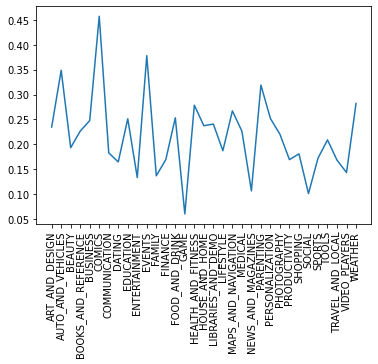

In [13]:
x = sorted([i for i in combined_df['Category'].unique()])
y = [i for i in combined_df.groupby('Category')['Sentiment_Polarity'].mean()]
plt.xticks(rotation = 90)
plt.plot(x,y)

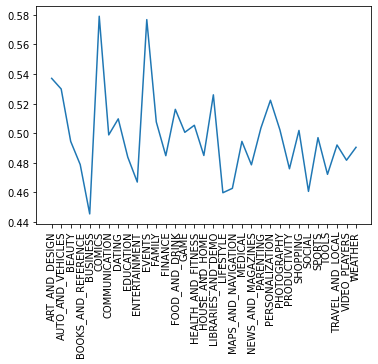

In [14]:
z = [i for i in combined_df.groupby('Category')['Sentiment_Subjectivity'].mean()]
x = sorted([i for i in combined_df['Category'].unique()])
plt.xticks(rotation = 90)
plt.plot(x,z)

So from the above we can see that comics and event categories have more subjectivity than the game category that means comics and events categories have more opinion based reviews than games.

**Now lets find out the Average setiment polarity per app**

In [15]:
cleaned_df = combined_df[['App','Sentiment_Polarity']].dropna()
cleaned_df

,App,Sentiment_Polarity
0,Coloring book moana,-0.250000
1,Coloring book moana,-0.725000
2,Coloring book moana,0.000000
4,Coloring book moana,0.500000
5,Coloring book moana,-0.800000
...,...,...
122646,A+ Gallery - Photos & Videos,0.475000
122652,A+ Gallery - Photos & Videos,0.566667
122659,A+ Gallery - Photos & Videos,0.200000
122660,A+ Gallery - Photos & Videos,0.000000


In [16]:
cleaned_df.groupby('App').agg({'Sentiment_Polarity':'mean'})

,Sentiment_Polarity
App,
10 Best Foods for You,0.470733
11st,0.181294
1800 Contacts - Lens Store,0.318145
1LINE – One Line with One Touch,0.196290
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.449566
...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.101622
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765
Hotstar,0.038178


**Sentiment polarity indicates how much a review is inclined to positivity or negativity and sentiment subjectivity indicates how much factual or emotional that review is. So lets see if there is any co relation between two**

In [17]:
sentiment_df = combined_df[['Sentiment_Polarity','Sentiment_Subjectivity']].dropna()
sentiment_df

,Sentiment_Polarity,Sentiment_Subjectivity
0,-0.250000,1.000000
1,-0.725000,0.833333
2,0.000000,0.000000
4,0.500000,0.600000
5,-0.800000,0.900000
...,...,...
122646,0.475000,0.512500
122652,0.566667,0.733333
122659,0.200000,0.200000
122660,0.000000,0.000000


In [18]:
sentiment_df.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.227551
Sentiment_Subjectivity,0.227551,1.000000


As we can see here we have a positive co-relation but not very much so we cant say what can be the sentiment subjectivity by looking at the sentiment polarity alone.

**Lets create box plots for two sentiment polarity and sentiment subjectivity to know where most of the values lie**

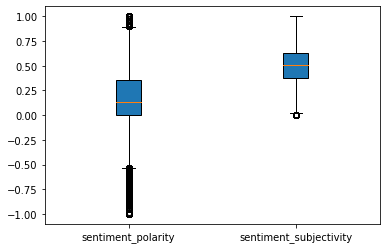

In [19]:
x = [i for i in sentiment_df['Sentiment_Polarity']]
y = [i for i in sentiment_df['Sentiment_Subjectivity']]
plt.boxplot((x,y),patch_artist=True,labels = ['sentiment_polarity','sentiment_subjectivity'])
plt.show()

**Lets see which category have how much positiveness and negativeness by comparing the sentiment with the category**

In [20]:
#first lets make a dataframe by cleaning the na values in sentiment column from combined_df
sentiment_category_df = combined_df[['Category','Sentiment']].dropna()
sentiment_category_df

,Category,Sentiment
0,ART_AND_DESIGN,Negative
1,ART_AND_DESIGN,Negative
2,ART_AND_DESIGN,Neutral
4,ART_AND_DESIGN,Positive
5,ART_AND_DESIGN,Negative
...,...,...
122646,PHOTOGRAPHY,Positive
122652,PHOTOGRAPHY,Positive
122659,PHOTOGRAPHY,Positive
122660,PHOTOGRAPHY,Neutral


In [21]:
#lets create a completely new dataframe by grouping the category and sentiment
new_df = sentiment_category_df.groupby(['Sentiment','Category']).size().to_frame(name = 'count').reset_index()
new_df

,Sentiment,Category,count
0,Negative,ART_AND_DESIGN,61
1,Negative,AUTO_AND_VEHICLES,17
2,Negative,BEAUTY,65
3,Negative,BOOKS_AND_REFERENCE,134
4,Negative,BUSINESS,342
...,...,...,...
94,Positive,SPORTS,2201
95,Positive,TOOLS,1090
96,Positive,TRAVEL_AND_LOCAL,1824
97,Positive,VIDEO_PLAYERS,190


In [22]:
#now lets make a pivot to see which category has how much positive,negative and neutral reviews
pivotted_new_df = new_df.pivot(index='Category',columns='Sentiment',values='count')
pivotted_new_df

Sentiment,Negative,Neutral,Positive
Category,,,
ART_AND_DESIGN,61,62,259
AUTO_AND_VEHICLES,17,36,236
BEAUTY,65,88,185
BOOKS_AND_REFERENCE,134,130,551
BUSINESS,342,555,1450
COMICS,2,8,72
COMMUNICATION,372,285,1292
DATING,697,530,1971
EDUCATION,216,132,1346


In [23]:
#lets find out most negative reviewed category
pivotted_new_df[pivotted_new_df['Negative']==pivotted_new_df['Negative'].max()]

Sentiment,Negative,Neutral,Positive
Category,,,
GAME,7270,814,11041


In [24]:
#lets find out most positive reviewed category
pivotted_new_df[pivotted_new_df['Positive']==pivotted_new_df['Positive'].max()]

Sentiment,Negative,Neutral,Positive
Category,,,
GAME,7270,814,11041


In [25]:
#lets find minimum number of negative reviewed Category
pivotted_new_df[pivotted_new_df['Negative']==pivotted_new_df['Negative'].min()]

Sentiment,Negative,Neutral,Positive
Category,,,
COMICS,2,8,72


In [26]:
#lets find minimum number of positive reviewed Category
pivotted_new_df[pivotted_new_df['Positive']==pivotted_new_df['Positive'].min()]

Sentiment,Negative,Neutral,Positive
Category,,,
COMICS,2,8,72


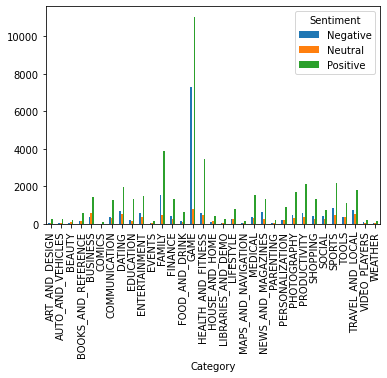

In [27]:
#lets plot the pivot
pivotted_new_df.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()